<a href="https://colab.research.google.com/github/KimMunho/ComputerVision/blob/main/HW2/HW2_2020039012_KimMunho_(2_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### HW2-3

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
원본이미지



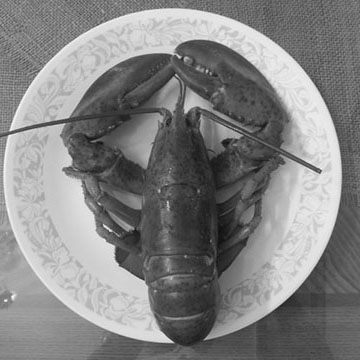

1번 마스크 사용



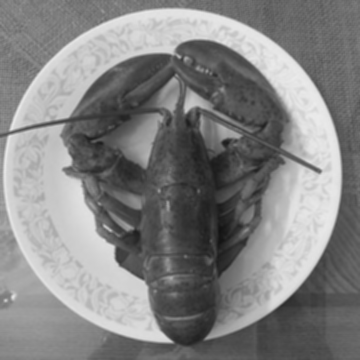

2번 마스크 사용



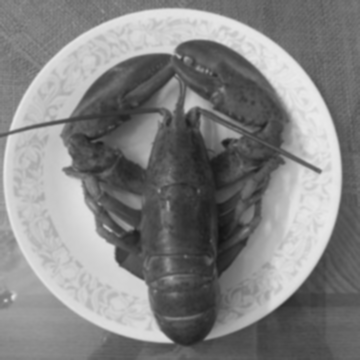

3번 마스크 사용



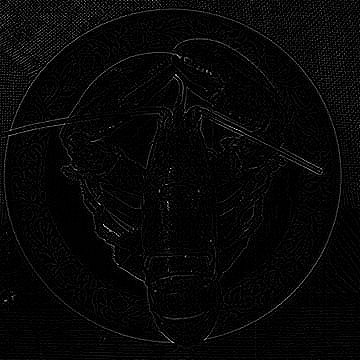

4번 마스크 사용



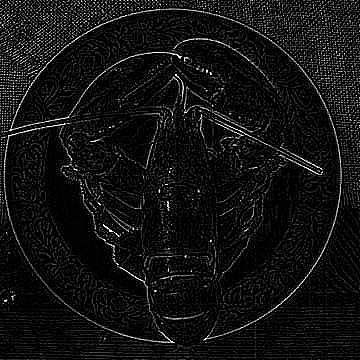

5번 마스크 사용



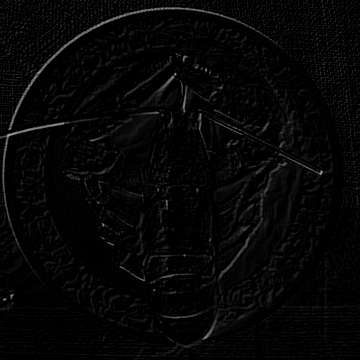

6번 마스크 사용



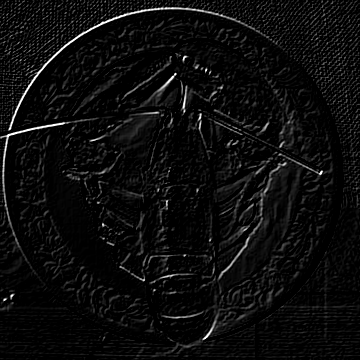

In [ ]:
 # OpenCV를 사용하기 위한 초기 설정

import cv2
import numpy as np   # 넘파이 사용
import matplotlib.pyplot as plt   # matplotlib : 시각화라이브러리
from google.colab.patches import cv2_imshow    # colab에서 cv.imshow 사용

# 이미지 불러오기

from google.colab import drive
drive.mount('/content/drive')

img_path = '/content/drive/MyDrive/Colab Notebooks/ComputerVision/HW2/add1.jpg'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

if img is None:
    print("Import Failed")

import matplotlib.pyplot as plt

# 원본 이미지
print("원본이미지\n")
cv2_imshow(img)

# 마스크를 사용하여 컨볼루션


### 1번 마스크 사용 - 평균 필터 (3x3)
# 이미지가 부드러워 지고 흐려진다

avg_kernel = np.array([
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9]
], dtype=np.float32)
avg_blur = cv2.filter2D(img, -1, avg_kernel)

print("1번 마스크 사용\n")
cv2_imshow(avg_blur)


### 2번 마스크 사용 - 가우시안 필터 (5x5, 고정 가중치)
# 위의 평균 필터보다 조금 더 자연스럼게 흐려진다

gaussian_kernel = np.array([
    [0.0030, 0.0133, 0.0219, 0.0133, 0.0030],
    [0.0133, 0.0596, 0.0983, 0.0596, 0.0133],
    [0.0219, 0.0983, 0.1621, 0.0983, 0.0219],
    [0.0133, 0.0596, 0.0983, 0.0596, 0.0133],
    [0.0030, 0.0133, 0.0219, 0.0133, 0.0030]
], dtype=np.float32)
gaussian_blur = cv2.filter2D(img, -1, gaussian_kernel)

print("2번 마스크 사용\n")
cv2_imshow(gaussian_blur)


### 3번 마스크 사용 - 4방향 Laplacian 필터
# 전체적으로 어두워지고 거의 윤곽선만 남아있다

laplacian_kernel = np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
], dtype=np.float32)
Laplacian4 = cv2.filter2D(img, -1, laplacian_kernel)

print("3번 마스크 사용\n")
cv2_imshow(Laplacian4)

### 4번 마스크 사용 - 8방향 Laplacian 필터
# 4방향 Laplacian 필터보다는 밝지만 여전희 윤곽선에 표현이 집중된다

laplacian_kernel_8dir = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
], dtype=np.float32)

Laplacian8 = cv2.filter2D(img, -1, laplacian_kernel_8dir)

print("4번 마스크 사용\n")
cv2_imshow(Laplacian8)


### 5번 마스크 사용 - 수직 엣지 필터 1
# 어두운 공간에서 동남방향으로 빛을 비추는 느낌의 효과가 나타남

kernel_1 = np.array([
    [-1, 0, 0],
    [ 0, 0, 0],
    [ 0, 0, 1]
], dtype=np.float32)
edge_1 = cv2.filter2D(img, -1, kernel_1)

print("5번 마스크 사용\n")
cv2_imshow(edge_1)


### 6번 마스크 사용 - 수직 엣지 필터 2
# 위의 수직 엣지 필터 1과 비슷한 효과이지만 조금 더 밝은 빛을 비추는 느낌이 나타남

kernel_2 = np.array([
    [-1, -1,  0],
    [-1,  0,  1],
    [ 0,  1,  1]
], dtype=np.float32)
edge_2 = cv2.filter2D(img, -1, kernel_2)

print("6번 마스크 사용\n")
cv2_imshow(edge_2)

